### Plotting the number of pending cases 

#### How the data was preprocessed and analyzed?
- This was achieved by using the `date-of-filing` and `date-of-decision` columns
- A case is considered pending on a given date if the `date-of-filing` has passed but the `date-of-decision` has not been passed.
- The columns `date-of-filing` and `date-of-decision` were cleaned using the `Pandas.to_datetime()` method with the parameter `errors = coerce` to fill `NaT` in entries which were not in the correct `TimeStamp` format.
- The previous steps ensures that there are no faulty entries in either columns.
- A frequency map was created using `DataFrame[column].value_counts()`.
- Frequency of non occurent dates were filled with zeros using the `PandaSeries.reindex(range_of_dates, fill_value=0)` method.
- The graph is only shown for the given year, since, no cases filed after the given year are actually present in the `csv` file.

In [ ]:
# def pending_cases(df : pd.DataFrame, case_csv_year : int): 
#     df['date_of_filing'] = pd.to_datetime(
#         df['date_of_filing'], errors='coerce'
#     ).dt.date

#     df['date_of_decision'] = pd.to_datetime(
#         df['date_of_decision'], errors='coerce'
#     ).dt.date
    
#     range_of_dates = pd.date_range(
#                         f"{case_csv_year}-01-01", 
#                         f"{case_csv_year+1}-01-01"
#                     )

#     freq_filed_cases = df['date_of_filing'].value_counts()\
#                                            .asfreq('D', fill_value=0)

# #     freq_solved_cases = df['date_of_decision'].value_counts()\
# #                                               .asfreq('D', fill_value=0)

# #     freq_pending_cases = freq_filed_cases.subtract(freq_solved_cases)

#     df_pending_cases = pd.DataFrame({
#             'Date' : freq_filed_cases.index, 
#             'Num_filed_cases' : freq_filed_cases.values, 
#         })
    
#     df_pending_cases['weekday'] = df_pending_cases['Date'].dt.day_name()
    
#     return df_pending_cases

In [ ]:
# df_pending_cases = pending_cases(curr_df, 2014)
# case_csv_year = 2014

# pending_cases_plot_img(df_pending_cases, case_csv_year)

In [ ]:
# curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv"))

## Pending Cases plotter
- The number of cases received [TBX]

In [ ]:
def pending_cases_plot_img(df : pd.DataFrame, case_csv_year : int):
    fig = df.plot(
        x = 'Date', 
        y = ['Num_filed_cases'], 
        xlim = (f'{case_csv_year}-01-01', f'{case_csv_year + 1}-01-01'),
        ylim = (0,150000),
        figsize = (15,4)
    )
    return fig

## Iterating through all cases csv files
- Since, each `cases_[year].csv` is massive (~1-2 gigabytes) we will use a diff subplot for each csv file
- Each plot image is stored in a `plot_img_list`

In [ ]:
# plot_img_list = []
# df_list = []
# for year in range(2010, 2019):
#     curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"))
#     df_pending_cases = pending_cases(curr_df, year)
#     df_list.append(df_pending_cases)
#     plot_img_list.append(pending_cases_plot_img(df_pending_cases, year))

## Plotting number of cases filed on each day
- The `plot_img_list` obtained earlier can be iterated over and shown as subplots

In [ ]:
# curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv")
# df_pending_cases = pending_cases(curr_df, 2014)

# df.head()

In [ ]:
# curr_df_pending = pending_cases(curr_df)
# curr_df_pending['weekday'] = curr_df_pending['date'].dt.day_name()

# # curr_df_pending.head()


# freq_weekday = curr_df_pending.groupby(['weekday']).sum()
# freq_weekday.head()

# Insights on graphs obtained:
## Physical features of the graph
- The trend seems to violently oscillate.
- The amplitude of oscillation is increasing YoY.
- Weekends seem to be minimae getting only a fraction of cases on weekdays.
- Mondays and Wednesdays seem to be the maximae with Mondays receiving the highest number of cases on average.

## Implications of the physical features
- The density of cases filed are extremely high on weekdays, which suggests the direct
- The order of number of cases filed on peak days is of the order of 30000.
- The number of cases filed on peak days has steadily increased over the years.
- The period of 

# CLASSIFICATION PROBLEM IDEAS

- Given a day and Case ID, will it be decided on a given day.
- Given a day and Case ID, will it be decided on the next case day.
- 
- 

# Hello! I'm Ujjwal Shekhar:)
I will be analyzing the database of ~80 million Indian district court data across states from the Development Data Lab.

The csv file has been downloaded from [the dropbox link](https://www.dropbox.com/sh/hkcde3z2l1h9mq1/AAB2U1dYf6pR7qij1tQ5y11Fa/csv?dl=0&subfolder_nav_tracking=1).

The metadata can be found here:
- [Acts sections metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vTNxZtceqgzYlUogz-gJfMfqm-RygJZcqfZiFCQAsJYFG7BU1_ZT5aKTPrNODeDgRnoyZFBnjt2sghd/pubhtml)
- [All cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml)
- [Judges metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vSqcp7VlnFB4ujCCHV5uGHjBlwYf7Mo4B3N3aqdiAukS7VMY8lLGU9ejhHH4c8qCse8l1kc8yIkCnq9/pubhtml)

The following project was done as a part of the recruitment task given by [Precog Research Lab](https://precog.iiit.ac.in/).

# Importing modules and libraries

In [1]:
# IMPORTING MODULES
import os
import numpy as np 
import pandas as pd 
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib 
from sklearn.preprocessing import LabelEncoder
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
from plotly.offline import init_notebook_mode, iplot

from sklearn.model_selection import train_test_split

init_notebook_mode(connected=True)

# Context
![Shashi Tharoor gif](https://2.bp.blogspot.com/-6r5_T5XrC9Q/U6BLfMvIoLI/AAAAAAAABIc/kC5zGcduYCg/s1600/Waqt-ShashiKapoor.gif)
    
Ask any indian how they feel about the judicial system of their country, and they will come up with constant anecdotes of cases being stuck for years. The confidence that people have in our country's judicial system seems low, with as many as [4.7 crore cases](https://www.thehindu.com/news/national/indian-judiciary-pendency-data-courts-statistics-explain-judges-ramana-chief-justiceundertrials/article65378182.ece) pending.

We will look at a subset of cases (from 2010 to 2018) and look at judges' data and various other data provided to us. This will be a part of the **ANALYSIS** section of the recruitment task given.

Following this, we come up with a classification problem that will help with [TBX]. This will be a part of the **CLASSIFICATION** section.

```
NOTE: The markdown provided in this `.ipynb notebook` will also be clubbed together in the README.MD file in the Github Repository associated with the notebook.
```

# Setting path variables 
We will setup global path variables for easy access and uniformity throughout the notebook.

**_NOTE_**:
- Since each `cases_{year}.csv` file is very large, we will store the path to the `cases` folder instead.
- Similar reasons for the `/keys/` folder. 

In [2]:
JUDICIAL_DATA_CSV_FOLDER_PATH = "/kaggle/input/precog-recruitment-task-csv/"

ACTS_SECTIONS_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "acts_sections/acts_sections.csv"
                    )

CASES_CSV_FOLDER = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "cases/cases/"
                    )

JUDGES_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH,
                        "judges_clean/judges_clean.csv"
                    )
KEYS_CSV_FOLDER = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "keys/keys/"
                    )
print( f"""
    Judges CSV file path : {JUDGES_CSV}
    Cases CSV folder path : {CASES_CSV_FOLDER}
    Acts Sections CSV file path: {ACTS_SECTIONS_CSV}
    Keys CSV file path: {KEYS_CSV_FOLDER}
""")


    Judges CSV file path : /kaggle/input/precog-recruitment-task-csv/judges_clean/judges_clean.csv
    Cases CSV folder path : /kaggle/input/precog-recruitment-task-csv/cases/cases/
    Acts Sections CSV file path: /kaggle/input/precog-recruitment-task-csv/acts_sections/acts_sections.csv
    Keys CSV file path: /kaggle/input/precog-recruitment-task-csv/keys/keys/



# Pre-processing and analyzing data 
We will try analyzing the datasets we have. But before we analyze the data itself, we must get comfortable with the database and how it is structured and ensure that the data types are appropriate.
Following this we will look at many exploratory features of the data provided, this will be done for every file and at a later point, the preprocessing part will be standardised as a function for future use.


## Judges data
The [Judges metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vSqcp7VlnFB4ujCCHV5uGHjBlwYf7Mo4B3N3aqdiAukS7VMY8lLGU9ejhHH4c8qCse8l1kc8yIkCnq9/pubhtml) file gives us the following information, 

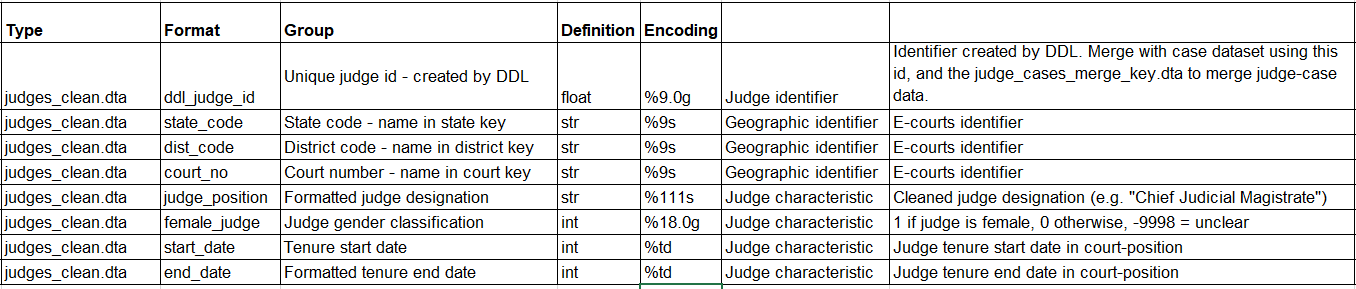

In [ ]:
df = pd.read_csv(JUDGES_CSV)
df.head()

Let's check whether or not the data type of each column is correct.

In [ ]:
df.dtypes

We can see that the `object` datatypes will actually be of the following types
- **judge_position** : `string`
- **female_judge** : [TBX]
- **start_date** and **end_date** : `Pandas.DateTime`

We will correct these dataypes first

In [ ]:
object_columns = df.select_dtypes(include = "object").columns
df[object_columns] = df[object_columns].astype("string")
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce').dt.date
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce').dt.date

df.dtypes

### Changing columns labels and replacing less readable values
On referring the DDL provided metadata (shown above), we realize that the following encoding was used in the `female_judge` column.

- 0 : male
- 1 : female
- -9998 : unclear

In [ ]:
df['female_judge'] = df['female_judge'].replace(
                ['0 nonfemale', '1 female', '-9998 unclear'],
                ['Male', 'Female', 'Unclear/Others']
            )
df = df.rename({'female_judge': 'gender'}, axis=1)
df['gender'] = df['gender'].astype("string")
df['gender'].head()

Since there is no numerical data to be analyzed, we will not use the `df.describe()` method here.

### Correlation matrix using Plotly.Express
We will use the correlation matrix to ensure that there are no columns with high correlation

**_NOTE:_** The corresponding correlation value has been shown as a colour, please refer to the color beside the correlation matrix image.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

In [ ]:
le = LabelEncoder()
df['judge_position'] = le.fit_transform(df['judge_position']) 
df['gender'] = le.fit_transform(df['gender'])
df['start_date'] = le.fit_transform(df['start_date'])
df['end_date'] = le.fit_transform(df['end_date'])

px.imshow(df.corr(),title="Correlation Plot of Judges' database")

- We can see that `ddl_judge_id` and `state_code` are highly positively correlated, with a correlation value of ~$0.97$, this might be happening since 
- We can also see that `start_date` and `end_date` are also highly positively correlated, which also makes sense since `start_date` and`end_date` are constrained.
- `court_no` and `judge_position` are also quite correlated with ~$0.27$. A possible explanation might be that The Supreme Court will have a greater density of higher ranked judges. Although we might investigate this further.
- `end_date` also has a correlation ~$0.19$ with `dist_code` and `state_code`. 
<br>

## Making a preprocessing function for Judges' csv file.

In [ ]:
def get_preprocessed_judges():
    df = pd.read_csv(JUDGES_CSV)
    object_columns = df.select_dtypes(include = "object").columns
    df[object_columns] = df[object_columns].astype("string")
    df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce').dt.date
    df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce').dt.date
    df['female_judge'] = df['female_judge'].replace(
                                            ['0 nonfemale', '1 female', '-9998 unclear'],
                                            ['Male', 'Female', 'Unclear/Others']
                                        )
    df = df.rename({'female_judge': 'gender'}, axis=1)
    df['gender'] = df['gender'].astype("string")
    df = df.dropna()
    
    df.dtypes
    return df

df = get_preprocessed_judges()


### Overall gender demographic across judges

In [ ]:
num_genders = df['gender'].value_counts()
num_genders.head()

fig = num_genders.plot.bar(x='lab', y='val', rot=0, title="Overall gender demographic across judges")

The ratio of male judges to female is approximately $2:1 :: Male : Female$

In [ ]:
df['court_no'].nunique()

In [ ]:
fig=px.histogram(df, 
                 x="judge_position",
                 color="gender",
                 hover_data=df.columns,
                 title="Judge demographic in different powers",
                 barmode="stack",
                 )\
      .update_xaxes(categoryorder="total descending")
fig.show()

Using the above histogram plot, we can see that majority of the judges are:

- Chief judicial magistrate
- Civil judge senior division
- Civil judge junior division
- Civil court
- Judicial magistrate court
- Additional Chief judicial magistrate
- City civil and sessions court
- Additional district and sessions court
- Family court
- Principal district and sessions court
- Principal civil judge; etc,.

We also observe that there are more male judges than female judges


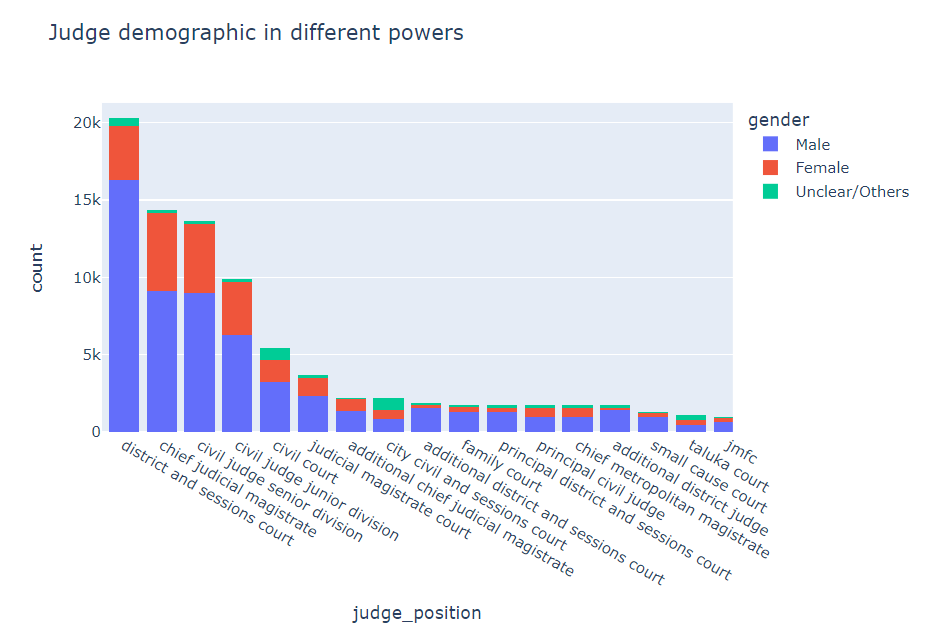

### Judges' gender demographic in different states

In [ ]:
fig=px.histogram(df, 
                 x="state_code",
                 color="gender",
                 hover_data=df.columns,
                 title="Judge gender demographic in different states",
                 barmode="stack",
                 )
fig.show()

We can see that the state with `state_code` = 1 has the highest total number of judges (~$22000$)

**_NOTE:_** The states have been anonimized using state codes.


We seem to have hit a roadblock, the judges csv seemingly gives no other insight.

### Trying to get hints for further analysis

Let's check if `end_date` has `NaN` values, so we can get the difference between them to get `total_days` they have worked for.

In [ ]:
df.isnull().sum()

Turns out that the `end_date` column DOES NOT have `Nan` values, if id did we would replace the `NaN` values to a date that can't logically be valid (like `01-01-2222`). Then we can simply get rid of all entries in the`total_days` column that can't be physically possible. 

### Creating the total days column

In [ ]:
df['total_days'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'D')
df

### Making a temporary dataframe
We make a temporary dataframe and select only the entries with`judge_position` entries occuring more than $2000$ times  

In [ ]:
sub_df = df.filter(['judge_position','total_days', 'gender', 'state_code', 'dist_code'], axis=1)\
        [df.groupby('judge_position').judge_position.transform('count')>2000].copy()

sub_df

### Finding distribution of `judge_position` along different `state_code`

In [ ]:
px.box(sub_df, x="judge_position", y="state_code", color="gender")

### Finding distribution of `judge_position` in different `dist_code`

In [ ]:
px.box(sub_df, x="judge_position", y="dist_code", color="gender")

### Violin plot to get insights on the data obtained

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.violinplot(
       x='total_days', 
       y='judge_position', 
       data=sub_df, 
       hue='gender', 
       ax=ax,
       title = "Judge_position in total days worked for",
    )

### Checking for skewness of features

In [ ]:
sub_df = df.filter(['total_days', 'gender'], axis=1)\
#         [df.groupby('judge_position').judge_position.transform('count')>2000].copy() 

plt.figure(figsize=(15,10))
for i,col in enumerate(sub_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Acts Section data
The [Acts Sections metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vTNxZtceqgzYlUogz-gJfMfqm-RygJZcqfZiFCQAsJYFG7BU1_ZT5aKTPrNODeDgRnoyZFBnjt2sghd/pubhtml) file gives us the following information.

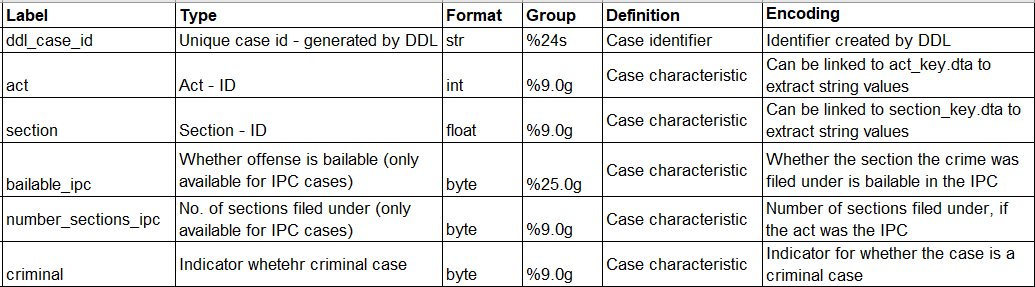

In [ ]:
df2 = pd.read_csv(ACTS_SECTIONS_CSV, dtype='unicode', usecols=['ddl_case_id', 'criminal'])
# df.head()

Lets check the data types

In [ ]:
df.dtypes

Since we had force`dtype=unicode` all columns now have `dtype` set as an `object`.

### Changing column labels and dtypes of columns

In [ ]:
df['ddl_case_id'] = df['ddl_case_id'].astype('string')
df['criminal'] = df['criminal'].astype('int64')

In [ ]:
df.dtypes

### Getting the number of criminals

`fig = px.histogram(df, x="criminal")` <br>
**WARNING** : Do not run the code, it might crash your laptop!!

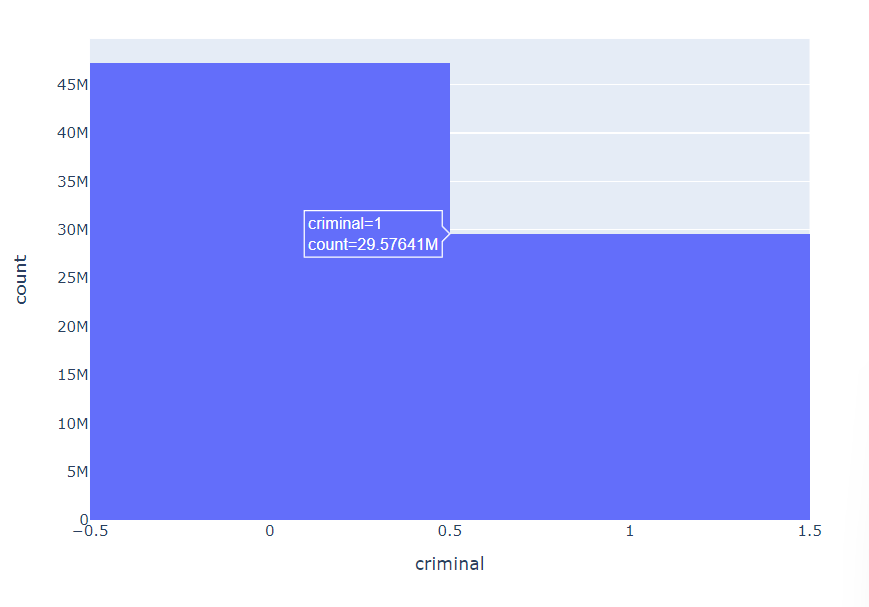

## Cases csv 
The [Cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml#) file gives us the following information,

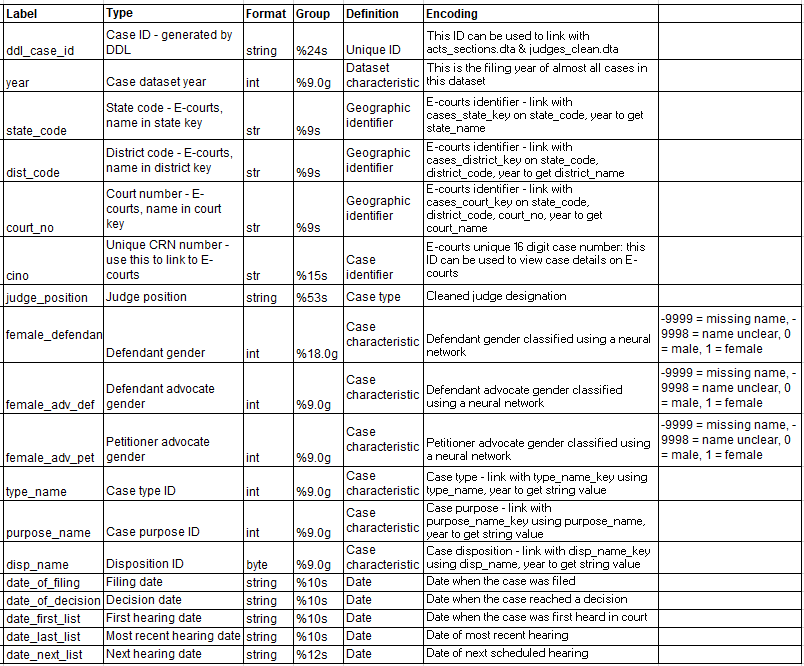

**NOTES:** 
- Since, each `case_{year}.csv` file is huge (~2GB each) we cannot handle more than one data frame at once.
- To be able to obtain insights for every year, we must make functions to handle a single data frame like before, except we can use a for-loop to call these functions for each `case_{year}.csv`.

Let's first make a list of years for easy reproducibility and readibility.

In [ ]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

### Exploring a sample csv
We will explore one case file and then make functions after every few steps so we can do the same for all `csv` files in the `CASES_CSV_FOLDER`.

**NOTE**: We will study the `cases_2014.csv` file, this csv has been selected since it is the median of `year_list` (No particular reason!)

In [ ]:
df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv"))
df.head()

Let's check for the dtypes, we can use the data obtained from the [Cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml#) file to then convert `object` dtypes to their corresponding valid dtypes.

In [ ]:
df.dtypes

In [ ]:
df.female_adv_def.unique()

There are a lot of columns that have to be converted into a non-object dtype!

In [ ]:
###Chaning column datatypes to strings where needed
def str_dtypes_preprocess(df):
    df['ddl_case_id'] = df['ddl_case_id'].astype("string")
    df['state_code'] = df['state_code'].astype("string")
    df['dist_code'] = df['dist_code'].astype("string")
    df['court_no'] = df['court_no'].astype("string")
    df['cino'] = df['cino'].astype("string")
    df['judge_position'] = df['judge_position'].astype("string")

## Fixing gender related columns' dataypes
def gender_dtypes_preprocess(df):
    ### Renaming and replacing values in `female_defendant` column
    df['female_defendant'] = df['female_defendant'].replace(
        ['0 nonfemale', '1 female', '-9998 unclear', '-9999 missing name'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({'female_defendant': 'judge_gender'}, axis=1)
    df['judge_gender'] = df['judge_gender'].astype("string")

    ### Renaming and replacing values in `female_petitioner` column
    df['female_petitioner'] = df['female_petitioner'].replace(
        ['0 nonfemale', '1 female', '-9998 unclear', '-9999 missing name'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({'female_petitioner': 'petitioner_gender'}, axis=1)
    df['petitioner_gender'] = df['petitioner_gender'].astype("string")

    ### Renaming and replacing values in `female_adv_def` column
    df['female_adv_def'] = df['female_adv_def'].replace(
        ['0', '1', '-9998', '-9999'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({'female_adv_def': 'adv_def_gender'}, axis=1)
    df['adv_def_gender'] = df['adv_def_gender'].astype("string")

    ### Renaming and replacing values in `female_adv_pet column
    df['female_adv_pet'] = df['female_adv_pet'].replace(
        ['0', '1', '-9998', '-9999'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({'female_adv_pet': 'adv_pet_gender'}, axis=1)
    df['adv_pet_gender'] = df['adv_pet_gender'].astype("string")

## Fixing date datatypes 
def date_dtype_preprocess(df):
    ### Fixing the `date_of_filing` and `date_of_decision` column
    df['date_of_filing'] = pd.to_datetime(
            df['date_of_filing'], errors='coerce'
        ).dt.date

    ### The `date_of_decision` column has too many NaT values, so we will ignore it
    # df['date_of_decision'] = pd.to_datetime(
    #         df['date_of_decision'], errors='coerce'
    #     ).dt.date

    ### Fixing the `date_first_list` column
    df['date_first_list'] = pd.to_datetime(
            df['date_first_list'], errors='coerce'
        ).dt.date

    ### Fixing the `date_last_list` column
    df['date_last_list'] = pd.to_datetime(
            df['date_last_list'], errors='coerce'
        ).dt.date

    ### Fixing the `date_next_list column
    df['date_next_list'] = pd.to_datetime(
            df['date_next_list'], errors='coerce'
        ).dt.date

In [ ]:
df.dtypes

We will drop all entries with any null value before studying the transforming strings by labelling them for correlation study

In [ ]:
df = df.dropna()

Now, that the data types have been fixed, and null values have been removed, lets plot the correlation matrix.

In [ ]:
le = LabelEncoder()
df['ddl_case_id'] = le.fit_transform(df['ddl_case_id'])
df['state_code'] = le.fit_transform(df['state_code']) 
df['dist_code'] = le.fit_transform(df['dist_code'])
df['court_no'] = le.fit_transform(df['court_no'])
df['cino'] = le.fit_transform(df['cino'])
df['judge_position'] = le.fit_transform(df['judge_position']) 
df['judge_gender'] = le.fit_transform(df['judge_gender'])
df['petitioner_gender'] = le.fit_transform(df['petitioner_gender'])
df['adv_def_gender'] = le.fit_transform(df['adv_def_gender'])
df['adv_pet_gender'] = le.fit_transform(df['adv_pet_gender'])
df['date_of_filing'] = le.fit_transform(df['date_of_filing']) 
# df['date_of_decision'] = le.fit_transform(df['date_of_decision'])
df['date_first_list'] = le.fit_transform(df['date_first_list'])
df['date_last_list'] = le.fit_transform(df['date_last_list'])
df['date_next_list'] = le.fit_transform(df['date_next_list'])

df = df.drop(['year'], axis=1)

In [ ]:
px.imshow(df.corr(),title="Correlation Plot of Judges' database", text_auto=True)

In [ ]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat, ax=ax, annot=True)
fig.show()

- `date_next_list` and `date_last_list` are extremely correlated, we suspect that this is because the last time the `next` date was the `last` date filled.
- `date_first_list` is also positively correlated with `date_next_list` and `date_last_list`. This might be happening since 
- `date_first_list` and `date_of_filing` are also decently correlated, that might be because 
- A bunch of pairs of genders (e.g.: `adv_pet_gender` and `pertitioner_gender`) also have a correlation value of >$0.25$ 

Unfortunately the data that we have in the description table has numerical methods that are merely keys of string values, this is of no use to us.

We will plot the correlation matrix but alas, it won't be of much help either for the same reasons.

### Defining a function to preprocess cases_csv file

In [7]:
def preprocessing_case_csv(year=None, test_mode=False, to_unlabel=False):
    if not test_mode:
        df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"))
    else:
        df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"), nrows=10000)
   
    ## The string 
    str_dtypes_preprocess(df)

    df['female_defendant'] = df['female_defendant'].replace(
        ['0 nonfemale', '0 male','1 female', '-9998 unclear', '-9999 missing name'],
        ['Male', 'Male', 'Female', 'Unclear/Others', 'Missing']
    )
    df = df.rename({'female_defendant': 'defendant_gender'}, axis=1)
    df['defendant_gender'] = df['defendant_gender'].astype("string")


    df['female_petitioner'] = df['female_petitioner'].replace(
        ['0 nonfemale', '0 male', '1 female', '-9998 unclear', '-9999 missing name'],
        ['Male', 'Male', 'Female', 'Unclear/Others', 'Missing']
    )
    df = df.rename({'female_petitioner': 'petitioner_gender'}, axis=1)
    df['petitioner_gender'] = df['petitioner_gender'].astype("string")

    df['female_adv_def'] = df['female_adv_def'].astype("string")
    df['female_adv_def'] = df['female_adv_def'].replace(
        ['0', '1', '-9998', '-9999'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )
    df = df.rename({'female_adv_def': 'adv_def_gender'}, axis=1)
    df['adv_def_gender'] = df['adv_def_gender'].astype("string")

    df['female_adv_pet'] = df['female_adv_pet'].astype("string")
    df['female_adv_pet'] = df['female_adv_pet'].replace(
        ['0', '1', '-9998', '-9999'],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({'female_adv_pet': 'adv_pet_gender'}, axis=1)
    df['adv_pet_gender'] = df['adv_pet_gender'].astype("string")


    df['date_of_filing'] = pd.to_datetime(
            df['date_of_filing'], errors='coerce'
        ).dt.date

#     df['date_of_decision'] = pd.to_datetime(
#             df['date_of_decision'], errors='coerce'
#         ).dt.date


    df['date_first_list'] = pd.to_datetime(
            df['date_first_list'], errors='coerce'
        ).dt.date

    df['date_last_list'] = pd.to_datetime(
            df['date_last_list'], errors='coerce'
        ).dt.date

    df['date_next_list'] = pd.to_datetime(
            df['date_next_list'], errors='coerce'
        ).dt.date

    if to_unlabel:
        ### Joining states
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_state_key.csv"),
                                usecols = ['year','state_code', 'state_name'])
        df_merge['state_code'] = df_merge['state_code'].astype('string')
        df = df.merge(df_merge, on=['year', 'state_code'])
        
        ### Joining purpose names
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "purpose_name_key.csv"),
                              usecols=['year', 'purpose_name', 'purpose_name_s'])
        df = df.merge(df_merge, on=['year', 'purpose_name'])
        
        ### Joining disposition names
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"),
                              usecols=['year', 'disp_name', 'disp_name_s'])
        df = df.merge(df_merge, on=['year', 'disp_name'])
        
        ### Joining type names
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "type_name_key.csv"),
                              usecols=['year', 'type_name', 'type_name_s'])
        df = df.merge(df_merge, on=['year', 'type_name'])
        
        ### Joining districts
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_district_key.csv"),
                                usecols = ['state_code', 'dist_code', 'district_name'])
        df_merge['state_code'] = df_merge['state_code'].astype('string')
        df_merge['dist_code'] = df_merge['dist_code'].astype('string')
        df = df.merge(df_merge, on=['state_code', 'dist_code'])
        
        ### Joining court names
        df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_court_key.csv"),
                                usecols = ['year', 'state_code', 'dist_code', 'court_no', 'court_name'])
        df_merge['state_code'] = df_merge['state_code'].astype('string')
        df_merge['dist_code'] = df_merge['dist_code'].astype('string')
        df_merge['court_no'] = df_merge['court_no'].astype('string')
        df = df.merge(df_merge, on=['year', 'state_code', 'dist_code', 'court_no'])
        
        ### Removing extraneous columns
        df = df.drop(columns=['cino', 
                              'state_code', 'dist_code', 
                              'court_no', 'purpose_name', 
                              'type_name', 'disp_name'])
    return df

### Number of cases filed each day

We must look at how the number of filed cases changes over different time frames.

In [ ]:
plot_list = []
pending_cases_list = []
for year in range(2014,2016):
    df = preprocessing_case_csv(year)

    freq_filed_cases = df['date_of_filing']\
                            .value_counts()\
                            .asfreq('D', fill_value=0)

    df_pending_cases = pd.DataFrame({
            'Date' : freq_filed_cases.index, 
            'Num_filed_cases' : freq_filed_cases.values, 
        })

    df_pending_cases['weekday'] = df_pending_cases['Date']\
                                            .dt.day_name()
    
#     pending_cases_list.append(df_pending_cases)
    
    fig1 = px.line(df_pending_cases, x='Date', \
                   y="Num_filed_cases", range_y = (0,150000))
    fig2 = px.histogram(df_pending_cases, 
                 x="weekday",
                 title="Judge gender demographic in different states",
          )
    plot_list.append([fig1, fig2])

In [ ]:
# print(plot_list)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
fig.add_trace(fig1)
fig.add_trace(fig2)
fig.add_trace(fig3)
fig.add_trace(fig4)

In [ ]:
fig = px.histogram(df, x="disp_name")

In [ ]:
fig.show()

We seem to have hit a wall here. But, we can always study the frequency and demographics.

**NOTE**: Going ahead it makes sense to study the frequency of occurence of certain values and trying to study the difference between the dates to get a time series analysis.

The reason that we are doing this is that the data in its current form will only give us `string` as data. The best thing to do will be to generate demographics and study it's skewness, we might find a good classification strategy in doing so (hopefully!!).


# Insight #1
## Analyzing criminal cases that get dismissed

A dismission is the disposition of a case when there isn't enough evidence for the case to continue, states with higher number of dismissed cases means that the judicial setup of that state is not competent enough and might suggest some form of corruption

### Merging appropriate dataframes 

We will start off by loading `cases_{year}.csv` here, for testing purposes let's try this with `case_2014.csv`. Then, we will merge the`criminal` column from `acts_sections.csv`.

In [3]:
df_acts_section = pd.read_csv(ACTS_SECTIONS_CSV, usecols=['ddl_case_id', 'act', 'section', 'criminal'])

In [ ]:
df = preprocessing_case_csv(year=2014, to_unlabel=True)
df = df.merge(df_acts_section, on=['ddl_case_id'])

df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                      usecols=['act', 'act_s'])
df = df.merge(df_merge, on='act')

df.head(10)

In [ ]:
df = df.dropna()

### Checking how quickly each state responds to a criminal case being filed
We can check this by finding the number of days between `date_first_list` and `date_of_filing`.

In [ ]:
df['date_first_list'] = pd.to_datetime(
    df['date_first_list'], errors='coerce'
).dt.date
df["quickness_of_action"] = ((df.date_first_list - df.date_of_filing)/np.timedelta64(1, 'D')).astype(int)

We will remove all non-criminal cases.

In [ ]:
df.criminal = df.criminal.astype('bool')
df.criminal.value_counts()

In [ ]:
df = df[(df.criminal == True)]

Let's also drop the `ddl_case_id` and `cino` columns since they are unique identifiers mostly useful for connecting tables.

In [ ]:
df = df.drop(columns=['ddl_case_id', 'act'])

Let's plot the correlation matrix before replacing labels with their string values.

In [ ]:
px.imshow(df.corr())

In [ ]:
df.info()

Finally, let's use the `keys` folder to switch from labels to their values

In [ ]:
avg_quickness_states = df.groupby(['state_name'])['quickness_of_action'].mean()
avg_quickness_states.sort_values(ascending=False)
avg_quickness_states.head(10)

In [ ]:
px.line(avg_quickness_states)

### Getting statewise time taken for a case to get its first hearing date from the day of filing.

In [ ]:
time_taken_states = avg_quickness_states.to_frame()
time_taken_states = time_taken_states.reset_index()
time_taken_states.head(10)

In [ ]:
time_taken_states = time_taken_states.replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )
val = time_taken_states[time_taken_states['state_name']=='Jammu & Kashmir'].values[0][1]
time_taken_states = time_taken_states.append({
    'state_name' : 'Ladakh',
    'quickness_of_action' : val
}, ignore_index=True)

In [ ]:
px.choropleth(
    time_taken_states,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='quickness_of_action',
    color_continuous_scale='Reds',
    fitbounds="locations"
)

In [ ]:
avg_quickness_district = df.groupby(['district_name'])['quickness_of_action'].mean()
avg_quickness_district = avg_quickness_district.to_frame()
avg_quickness_district = avg_quickness_district.reset_index()

# avg_quickness_district = avg_quickness_district[avg_quickness_district.quickness_of_action > 1000]
avg_quickness_district.head(10)

In [ ]:
px.choropleth(
    avg_quickness_district,
    geojson="https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson",
    featureidkey='properties.NAME_2',
    locations='district_name',
    color='quickness_of_action',
    fitbounds="locations",
    color_continuous_scale='Viridis',
    title='District-wise criminal dispositions',
)

### Making a frequency table of each disposition

In [ ]:
df.head()

In [ ]:
disp_freq_state_wise = (df.groupby(['year', 'disp_name_s'])['state_name'].value_counts()).to_frame()
disp_freq_state_wise.columns = ['count']
disp_freq_state_wise = disp_freq_state_wise.reset_index()
disp_freq_state_wise['state_name'] = disp_freq_state_wise['state_name'].replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )

val = disp_freq_state_wise[disp_freq_state_wise['state_name']=='Jammu & Kashmir'].values
for entry in val:
    disp_freq_state_wise = disp_freq_state_wise.append({
        'state_name' : 'Ladakh',
        'disp_name_s' : entry[1],
        'year' : entry[0],
        'count': entry[3]
    }, ignore_index=True)

disp_freq_state_wise.head(10)

In [ ]:
px.choropleth(
    disp_freq_state_wise,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='count',
    animation_frame='disp_name_s',
    fitbounds="locations",
    color_continuous_scale='YlOrRd',
    title='Statewise criminal dispositions'
)

### Analyzing district-wise to get clusters of dispositions across the map

In [ ]:
disp_freq_district_wise = (df.groupby(['year', 'disp_name_s'])['district_name'].value_counts()).to_frame()
disp_freq_district_wise.columns = ['count']
disp_freq_district_wise = disp_freq_district_wise.reset_index()

disp_freq_district_wise.head(10)

In [ ]:
px.choropleth(
    disp_freq_district_wise,
    geojson="https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson",
    featureidkey='properties.NAME_2',
    locations='district_name',
    color='count',
    animation_frame='disp_name_s',
    fitbounds="locations",
    color_continuous_scale='Viridis',
    title='District-wise criminal dispositions',
)

### Standardizing everything as a function, and putting yearwise plots/series in lists that we will later access

In [ ]:
quickness_line_plots = []
time_taken_states_chloropleths = []
avg_quickness_states_list = []

# avg_quickness_district_list = []
# time_taken_districts_chloropleths = []

state_wise_disp_list = []
state_wise_disp_chloropleths = []

# district_wise_disp_list = []
# district_wise_disp_chloropleths = []

In [50]:
def state_vs_time(df):
    ### Rate of response study of criminal cases
    avg_quickness_states = df.groupby(['state_name'])['quickness_of_action'].mean()
    avg_quickness_states.sort_values(ascending=False)
    
    

SyntaxError: unexpected EOF while parsing (1448584881.py, line 1)

In [ ]:
# def insight_1(df):
#     ### Rate of response study of criminal cases
#     avg_quickness_states = df.groupby(['state_name'])['quickness_of_action'].mean()
#     avg_quickness_states.sort_values(ascending=False)
    
    ### Save the series obtained
    avg_quickness_states_list.append(avg_quickness_states)

    ### Save the line plot
    fig = px.line(avg_quickness_states)
    quickness_line_plots.append(fig)
    
    ### Plot chloropleth
    time_taken_states = avg_quickness_states.to_frame()
    time_taken_states = time_taken_states.reset_index()
    
    time_taken_states = time_taken_states.replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )
    val = time_taken_states[time_taken_states['state_name']=='Jammu & Kashmir'].values[0][1]
    time_taken_states = time_taken_states.append({
        'state_name' : 'Ladakh',
        'quickness_of_action' : val
    }, ignore_index=True)
    time_taken_states = time_taken_states.replace(
                ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
                ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
            )
    val = time_taken_states[time_taken_states['state_name']=='Jammu & Kashmir'].values[0][1]
    time_taken_states = time_taken_states.append({
        'state_name' : 'Ladakh',
        'quickness_of_action' : val
    }, ignore_index=True)
    
    fig = px.choropleth(
        time_taken_states,
        geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
        featureidkey='properties.ST_NM',
        locations='state_name',
        color='quickness_of_action',
        color_continuous_scale='Reds',
        fitbounds="locations"
    )
    ### Save chloropleth for the time taken for each state
    time_taken_states_chloropleths.append(fig)
    
    ### Statewise disposition choloropleth heat map
    disp_freq_state_wise = (df.groupby(['year', 'disp_name_s'])['state_name'].value_counts()).to_frame()
    disp_freq_state_wise.columns = ['count']
    disp_freq_state_wise = disp_freq_state_wise.reset_index()
    disp_freq_state_wise['state_name'] = disp_freq_state_wise['state_name'].replace(
                ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
                ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
            )

    val = disp_freq_state_wise[disp_freq_state_wise['state_name']=='Jammu & Kashmir'].values
    for entry in val:
        disp_freq_state_wise = disp_freq_state_wise.append({
            'state_name' : 'Ladakh',
            'disp_name_s' : entry[1],
            'year' : entry[0],
            'count': entry[3]
        }, ignore_index=True)

    state_wise_disp_list.append(disp_freq_state_wise)
    
    ### Saving the chloropleth obtained
    fig = px.choropleth(
        disp_freq_state_wise,
        geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
        featureidkey='properties.ST_NM',
        locations='state_name',
        color='count',
        animation_frame='disp_name_s',
        fitbounds="locations",
        color_continuous_scale='YlOrRd',
        title='Statewise criminal dispositions'
    )
    
    state_wise_disp_chloropleths.append(fig)
    

### Running a loop over all years

**NOTE:** This might take a while to run, since each case csv is massive and merging it with the huge 3gb acts_sections file is also painful

In [ ]:
for year in range(2010,2012):
    df = preprocessing_case_csv(year=year, to_unlabel=True)
    df = df.merge(df_acts_section, on=['ddl_case_id'])

    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                          usecols=['act', 'act_s'])
    df = df.merge(df_merge, on='act')
    
    df = df.dropna()
    df['date_first_list'] = pd.to_datetime(
        df['date_first_list'], errors='coerce'
    ).dt.date
    df["quickness_of_action"] = ((df.date_first_list - df.date_of_filing)/np.timedelta64(1, 'D')).astype(int)

    df.criminal = df.criminal.astype('bool')
    
    df = df[(df.criminal == True)]
    df = df.drop(columns=['ddl_case_id', 'act'])
    
    insight_1(df)

Adding a list of contrasting colors so that the plot is easy to view

In [ ]:
colors_list = [
    "#808000",
    "#911eb4",
    "#9A6324",
    "#000000",
    "#000075",
    "#fabed4",
    "#aaffc3",
    "#dcbeff",
]

Making a `fig_net` figure by merging data all across the `quickness_line_plots` list that we have

In [ ]:
for i in range(int(len(quickness_line_plots))):
    quickness_line_plots[i]['data'][0]['line']['color']=colors_list[i]
    quickness_line_plots[i]['data'][0]['name'] = str(2010+i)
    
data = quickness_line_plots[0].data
for i in range(int(len(quickness_line_plots))):
    if i != 0:
        data += quickness_line_plots[i].data
fig_net = go.Figure(data=data)
fig_net.show()

In [ ]:
def plot_state_wise_choropleths(choropleth_list : list, non_sp_mode=False):
    
    if non_sp_mode:
        for i, f in enumerate(choropleth_list):
            f.data[0].name = 2010+i
            f.layout.coloraxis.colorbar.title.text = "Year "+str(2010+i)

            f.show()
        return
    
    years_list = [int(i) for i in range(2010,2012)]
    rows = 2
    cols = 1

    fig = sp.make_subplots(
        rows=rows, cols=cols,
        specs = [[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
        subplot_titles = years_list)
 
    for i, f in enumerate(choropleth_list):
        fig.add_trace(f.data[0], row = i//cols+1, col = i%cols+1)
#         print(f.layout)
    
#     fig.layout.geo['fitbounds'] = 'locations'
#     fig.layout.geo2['fitbounds'] = 'locations'
#     fig.layout['updatemenus'] = choropleth_list[1].layout.updatemenus
# #     fig.frames = choropleth_list[0].frames
#     fig.frames = choropleth_list[1].frames
    fig.show()

In [ ]:
plot_state_wise_choropleths(time_taken_states_chloropleths)

In [ ]:
plot_state_wise_choropleths(state_wise_disp_chloropleths, True)

## Insights obtained from analyzing state-wise time taken


# Insight #2
## Analyzing marriage related cases, religion-marriage case count, child marriage case count


In [ ]:
df = preprocessing_case_csv(year=2014, to_unlabel=True)

In [ ]:
df = df.merge(df_acts_section, on=['ddl_case_id'])
df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                      usecols=['act', 'act_s'])
df = df.merge(df_merge, on='act')

In [ ]:
df = df.dropna()

In [ ]:
pattern = '.*(Marriage|marriage|MARRIAGE|Divorce|DIVORCE).*'
df2 = df[df.act_s.str.match(pattern)]
df2.head()

In [ ]:
df2.act_s.unique()

### Making clusters based on religion
We will try to analyze marriage related cases in different religions

To do this, we will add a column `act_religion`
The column will use a regex pattern to detect the religion.

In [ ]:
def get_religion(act_s : str):
    pattern_hindu = '.*(Hindu|HINDU|hindu).*'
    pattern_muslim = '.*(muslim|MUSLIM|Muslim).*'
    pattern_christian = '.*(christian|CHRISTIAN|Christian).*'
    pattern_parsi = '.*(parsi|PARSI|Parsi).*'
    
    if bool(re.search(pattern_hindu, act_s)):
        return "Hindu"
    elif bool(re.search(pattern_muslim, act_s)):
        return "Muslim"
    elif bool(re.search(pattern_christian, act_s)):
        return "Christian"
    elif bool(re.search(pattern_parsi, act_s)):
        return "Parsi"
    else:
        return "Unclear"

df2['act_religion'] = df2.apply(lambda row : get_religion(row['act_s']), axis=1)

In [ ]:
df2.head()

# Warning are you removing a lot of data when coercing pddatetime in date_of_decision

We will drop columns with unclear religion and study the rest of the dataframe

In [ ]:
df3 = df2[~(df2['act_religion']=='Unclear')]
df3.head()

## Plotting geoPlot

In [ ]:
freq_religions_state = (df3.groupby(['state_name'])['act_religion'].value_counts())
freq_religions_state = freq_religions_state.to_frame()
freq_religions_state.columns = ['count']
freq_religions_state = freq_religions_state.reset_index()

freq_religions_state['state_name'] = freq_religions_state['state_name'].replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )

val = freq_religions_state[freq_religions_state['state_name']=='Jammu & Kashmir'].values

for entry in val:
    freq_religions_state = freq_religions_state.append({
        'state_name' : 'Ladakh',
        'act_religion' : entry[1],
        'count' : entry[2]
    }, ignore_index=True)

freq_religions_state.head(10)

In [ ]:
px.choropleth(
    freq_religions_state,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='count',
    animation_frame='act_religion',
    fitbounds="locations",
    color_continuous_scale='YlOrRd',
    title='Court cases by religion in each state'
)

## Generalizing it into a function and plotting necessary plots YoY

In [ ]:
df2 = df3.dropna()
df2['duration_of_case'] = df2.apply(lambda row : (row['date_of_decision'] - row['date_of_filing']).days, axis=1)
df2.head()

In [ ]:
duration_religions_state = (df2.groupby(['state_name', 'act_religion'])['duration_of_case'].mean())
duration_religions_state = duration_religions_state.to_frame()
duration_religions_state.columns = ['count']
duration_religions_state = duration_religions_state.reset_index()

duration_religions_state.head()

In [ ]:
state_religion_choropleths = []
duration_state_religion_choropleths = []

In [ ]:
def insight2(df):
    ### Getting statewise and religionwise cases
    freq_religions_state = (df.groupby(['state_name'])['act_religion'].value_counts())
    freq_religions_state = freq_religions_state.to_frame()
    freq_religions_state.columns = ['count']
    freq_religions_state = freq_religions_state.reset_index()

    freq_religions_state['state_name'] = freq_religions_state['state_name'].replace(
                ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
                ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
            )

    val = freq_religions_state[freq_religions_state['state_name']=='Jammu & Kashmir'].values

    for entry in val:
        freq_religions_state = freq_religions_state.append({
            'state_name' : 'Ladakh',
            'act_religion' : entry[1],
            'count' : entry[2]
        }, ignore_index=True)
        
    ### Saving the choropleth obtained
    fig = px.choropleth(
        freq_religions_state,
        geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
        featureidkey='properties.ST_NM',
        locations='state_name',
        color='count',
        animation_frame='act_religion',
        fitbounds="locations",
        color_continuous_scale='YlOrRd',
        title='Court cases by religion in each state'
    )
    
    state_religion_choropleths.append(fig)
    
    ### Plotting duration of every case and its distribution
    df['duration_of_case'] = df.apply(lambda row : (row['date_of_decision'] - row['date_of_filing']).days, axis=1)
    
    duration_religions_state = (df.groupby(['state_name', 'act_religion'])['duration_of_case'].mean())
    duration_religions_state = duration_religions_state.to_frame()
    duration_religions_state.columns = ['count']
    duration_religions_state = duration_religions_state.reset_index()

    duration_religions_state['state_name'] = duration_religions_state['state_name'].replace(
                ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
                ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
            )

    val = duration_religions_state[duration_religions_state['state_name']=='Jammu & Kashmir'].values

    for entry in val:
        duration_religions_state = duration_religions_state.append({
            'state_name' : 'Ladakh',
            'act_religion' : entry[1],
            'count' : entry[2]
        }, ignore_index=True)
    
    ### Saving the plot
    fig = px.choropleth(
        duration_religions_state,
        geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
        featureidkey='properties.ST_NM',
        locations='state_name',
        color='count',
        animation_frame='act_religion',
        fitbounds="locations",
        color_continuous_scale='YlOrRd',
        title='Court cases by religion in each state'
    )
    
    duration_state_religion_choropleths.append(fig)

# Insight #3
## Checking if there is correlation between child marriage related cases and POCSO cases

In [ ]:
pattern = '.*(Child|CHILD|Children|child).*(Marriage|MARRIAGE|marriage).*'
df_child_marriage = df[df.act_s.str.match(pattern)]
df_child_marriage.head()

> 

In [ ]:
pattern = '.*(POCSO|pocso|posco|Pocso).*'
df_pocso = df[df.act_s.str.match(pattern)]
df_pocso.head()

In [ ]:
def get_type(act_s : str):
    pattern_child_marriage = '.*(Child|CHILD|Children|child).*(Marriage|MARRIAGE|marriage).*'
    pattern_pocso = '.*(POCSO|pocso|posco|Pocso).*'
    
    if bool(re.search(pattern_child_marriage, act_s)):
        return "Child Marriage"
    elif bool(re.search(pattern_pocso, act_s)):
        return "POCSO"
    else:
        return "Unclear"

df2['child_crime_type'] = df.apply(lambda row : get_type(row['act_s']), axis=1)

In [ ]:
df3 = df2[~(df2['act_s']=='Unclear')]
df3.head()

# Pre-classification section

We will try cleaning the data which includes:
- Handling null values
- Feature scaling
- Handling categorical variables

But, before we begin, we must choose our classification problem. 

A few options look interesting:
- Predicting if number of cases that will be filed on a given day in a particular court will be greater than the last day or not.
- Predicting the disposition of given case
- Predicting if the disposition is dismission of the case.

Let us start of with the easier one:
## Predicting if the disposition is dismission of the case
This is an example of **binary classification**

The first thing that is to be done is to use the `disp_name_key.csv` to replace the `disp_name` in every `case_{year}.csv` file.

### Merging case and disposition csv files

In [ ]:
df = preprocessing_case_csv(2014, True)
df_disp = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"))

df = df.merge(df_disp, on=['year', 'disp_name'])
df = df.drop(columns='count')
df.head(10)

In [ ]:
df.adv_def_gender.value_counts()

In [ ]:
df_acts_section = pd.read_csv(ACTS_SECTIONS_CSV, usecols=['ddl_case_id', 'act', 'criminal'])

In [ ]:
df = df.merge(df_acts_section, on=['ddl_case_id'])

In [ ]:
df.head(10)

# NEW IDEAS FOR CLASSIFICATION

- Given (first hearing date, most recent hearing date, next hearing date,{othercorrelated stuff}) --> predict if it will reach a decision in the next hearing
- Given ({correlated stuff}) --> predict case disposition
- Check for bias in case disposition w.r.t.:
    - are people in a particular state biased against the defendant?
    - is a particular state biased against females
    - is a judge biased against a certain type of act (favours defendent)

# Classification data
## Preprocessing
- Since we are done with the exploratory data analysis, it is time to figure out a classification problem and go ahead with the predictive analysis section.
- Since, most of our data was 

# Problem
## Checking if the case will be dismissed or not

## Feature Engineering and Data Splits

In [4]:
def is_dismissed(disp_name : str):
    if disp_name == "dismissed":
        return 1
    else:
        return 0

In [8]:
def preprocessing_data(year=None, test_mode=False):
    df = preprocessing_case_csv(year, test_mode=test_mode)

    ### Joining disposition names
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"),
                          usecols=['year', 'disp_name', 'disp_name_s'])
    df = df.merge(df_merge, on=['year', 'disp_name'])
    
    ### Adding column to indicate 1:Dismissed or 0:Not dismissed
    df['dismission'] = df['disp_name_s'].apply(lambda curr_disp_name : is_dismissed(curr_disp_name))
    
    ### Remmoving entries with disposition not recorded
    df = df[~(df['disp_name_s'] == "disposition var missing")]
    
    ### Adding act, section and criminal data by merging with `df_acts_sections`
    df = df.merge(df_acts_section, on=['ddl_case_id'])
    
    ### Removing unnecessary columns
    df = df.drop(columns=['ddl_case_id', 'year', 'cino', 'disp_name_s', 'court_no','date_of_decision'])
    
    ### Changing dates to duration 
    df = df.dropna()
    df['first_hearing_wait'] = (df['date_first_list'] - df['date_of_filing']).dt.days
    df['curr_hearing_wait'] = (df['date_next_list'] - df['date_last_list']).dt.days
    df['hearing_time_running'] = (df['date_last_list'] - df['date_first_list']).dt.days
    
    ### Conveting to int64
    df['purpose_name'] = df['purpose_name'].astype('int64')
    df['act'] = df['act'].astype('int64')
    df['section'] = df['section'].astype('int64')
    
    ### Removing date columns
    df = df.drop(columns=['date_of_filing', 'date_first_list', 'date_last_list', 'date_next_list'])

    return df

df_test = preprocessing_data(2011)
df_test.head()

,state_code,dist_code,judge_position,defendant_gender,petitioner_gender,adv_def_gender,adv_pet_gender,type_name,purpose_name,disp_name,dismission,act,section,criminal,first_hearing_wait,curr_hearing_wait,hearing_time_running
1,1,1,chief judicial magistrate,Male,Female,Missing,Male,1683,4613,25,0,4759,132871,1,0,30,89
3,1,1,chief judicial magistrate,Unclear/Others,Male,Male,Male,1683,2797,25,0,4759,1123673,1,3,0,0
4,1,1,chief judicial magistrate,Unclear/Others,Male,Male,Male,1683,2797,25,0,4759,1123673,1,10,1,13
5,1,1,chief judicial magistrate,Male,Unclear/Others,Missing,Male,1683,4762,25,0,8133,584866,0,9,36,67
6,1,1,chief judicial magistrate,Male,Female,Missing,Unclear/Others,1683,3737,25,0,4759,132871,1,0,42,260


## Data split

In [39]:
def encode_and_data_split(df):
    df = df.dropna()
    ### Encoding other columns
    le = LabelEncoder()
    df['state_code'] = le.fit_transform(df['state_code']) 
    df['dist_code'] = le.fit_transform(df['dist_code'])
    df['judge_position'] = le.fit_transform(df['judge_position']) 
    df['defendant_gender'] = le.fit_transform(df['defendant_gender'])
    df['petitioner_gender'] = le.fit_transform(df['petitioner_gender'])
    df['adv_def_gender'] = le.fit_transform(df['adv_def_gender'])
    df['adv_pet_gender'] = le.fit_transform(df['adv_pet_gender'])
    df['first_hearing_wait'] = le.fit_transform(df['first_hearing_wait']) 
    df['curr_hearing_wait'] = le.fit_transform(df['curr_hearing_wait'])
    df['hearing_time_running'] = le.fit_transform(df['hearing_time_running'])

    ### Splitting with respect to dismissionn
    missing=df[df['dismission'].isnull()]
    fill=df[df['dismission'].notnull()]

    y=fill['dismission']
    print(y.value_counts())
    x=fill.drop(columns = ['dismission', 'disp_name'])

    ### Encode the dismission column
    x=pd.get_dummies(x,drop_first=True)
    
    x.info()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2
                                                   ,random_state=101)

    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = encode_and_data_split(df_test)

0    1544693
1     251478
Name: dismission, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796171 entries, 1 to 2148182
Data columns (total 15 columns):
 #   Column                Dtype
---  ------                -----
 0   state_code            int64
 1   dist_code             int64
 2   judge_position        int64
 3   defendant_gender      int64
 4   petitioner_gender     int64
 5   adv_def_gender        int64
 6   adv_pet_gender        int64
 7   type_name             int64
 8   purpose_name          int64
 9   act                   int64
 10  section               int64
 11  criminal              int64
 12  first_hearing_wait    int64
 13  curr_hearing_wait     int64
 14  hearing_time_running  int64
dtypes: int64(15)
memory usage: 219.3 MB


### Using Naive Bayes

In [40]:
from sklearn.naive_bayes import BernoulliNB 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import confusion_matrix,classification_report

In [41]:
def naive_bayes(x_train=None, x_test=None, y_train=None, y_test=None):
    b=BernoulliNB()
    b.fit(x_train,y_train) 

    pred2=b.predict(x_test)
    pred1=b.predict(x_train)
    print(accuracy_score(y_test,pred2))
    print(accuracy_score(y_train,pred1))

    print("\n")

    cm = confusion_matrix(y_test,pred2)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

    
#     print(classification_report(y_test,pred2)) #shows all 
    
naive_bayes(x_train,x_test,y_train,y_test)

0.8595320611855749
0.8601044166198077


Accuracy when actually not dismissed 0.9999967613958384
Accuracy when actually dismissed 0.0




## Using Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
def logistic_regression(x_train=None, x_test=None, y_train=None, y_test=None):
    lr=LogisticRegression()
    lr.fit(x_train,y_train) 

    pred2=lr.predict(x_test)
    pred1=lr.predict(x_train)
    print(accuracy_score(y_test,pred2))
    print(accuracy_score(y_train,pred1))

    print("\n")

    cm = confusion_matrix(y_test,pred2)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")
    
naive_bayes(x_train,x_test,y_train,y_test)

0.8595320611855749
0.8601044166198077


Accuracy when actually not dismissed 0.9999967613958384
Accuracy when actually dismissed 0.0




## Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
def decision_tree(x_train=None, x_test=None, y_train=None, y_test=None):
    d=DecisionTreeClassifier()
    d.fit(x_train,y_train)
    y_pred=d.predict(x_test)

    print(accuracy_score(y_test,y_pred))
    
    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print(cm)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")
    
decision_tree(x_train, x_test, y_train, y_test)

0.8690996144585021


[[284568  24207]
 [ 22817  27643]]
Accuracy when actually not dismissed 0.9216031090599951
Accuracy when actually dismissed 0.5478200554894966




### Random forest classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
def random_forest(x_train=None, x_test=None, y_train=None, y_test=None):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)

    print(accuracy_score(y_test,y_pred))
    
    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print(cm)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

random_forest(x_train, x_test, y_train, y_test)

0.9035533842749175


[[300116   8659]
 [ 25988  24472]]
Accuracy when actually not dismissed 0.9719569265646506
Accuracy when actually dismissed 0.484978200554895




### Support Vector Machine

In [51]:
from sklearn.svm import SVC

In [ ]:
def svm(x_train=None, x_test=None, y_train=None, y_test=None):
    svc=SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)

    print(accuracy_score(y_test,y_pred))
    
    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print(cm)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

svm(x_train, x_test, y_train, y_test)

### Labelling dispositions

# Bibliography
- https://stackoverflow.com/questions/50089903/convert-column-to-timestamp-pandas-dataframe
- https://www.geeksforgeeks.org/get-minimum-values-in-rows-or-columns-with-their-index-position-in-pandas-dataframe/
- https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
- https://www.w3schools.com/python/pandas/ref_df_min.asp#:~:text=The%20min()%20method%20returns,minimum%20value%20for%20each%20row.
- https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/
- https://www.datasciencemadesimple.com/create-frequency-table-of-column-in-pandas-python-2/
- https://datagy.io/pandas-value-counts/
- https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
- https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
-  https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
-  https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
-  https://stackoverflow.com/questions/61233041/module-not-found-error-no-module-named-chart-studio
-  https://plotly.com/python/ipython-notebook-tutorial/
- https://stackoverflow.com/questions/68149831/find-if-date-is-weekend-or-weekday-in-pandas-dataframe
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
- https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
- https://pynative.com/pandas-set-index/
- https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
- https://stackoverflow.com/questions/62230507/multiple-columns-for-hue-parameter-in-seaborn-violinplot
- https://seaborn.pydata.org/generated/seaborn.violinplot.html
- https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
- https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe
- https://stackoverflow.com/questions/48673428/python-pandas-pairwise-frequency-table-with-many-columns
- https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe
- https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
- 

# OFFICIAL SUBMISSION AREA END**
